# Contributions

### Some Data clarifications
- The data only has key-point values for single cow
- the dataset maintainer did not account for multiple cows in same image, but there are many images which have multiple cows, this creates descrepency for model that which cow to annotate?
- the data so not have bounding boxes for cows, which we can estimate boounding box for one cow based on the key-points, as mentioned before there are multiple cows in images

### Workflow
There are three works been doe or in progress
1) Object detection
2) Object Segmentation
3) Key-point detection


### 1) Object Detection
- While all cows are not annotated, COCO dataset already has cow as a trainign class, thus infering a pre-trained model trained on COCO should give us bounding boxes, even for multiple instances of cows.
    - Tried multiple models for this purpose such as `resnet50fpn` but finally chose `SSDlite` as it was fastest
    
    
### 2) Object Segmentation
- Same as object detetcion there are pre-trained segmentation models trained on COCO data


### 3) Key-point detection (Work in Progress)
- I have think of an idea as there is not complete key-point data is available
    - based on given key points, we can extract bounding box foir the single cow of interest (for which the keypoints are given)
    - crop the bounding box, now we have images with a single cow and key-point dfata for that cow
    - we can do trabsfer learning to retrain a key-point detetcion model which is originally trained to detect human key-points such as `torchvision.models.detection.keypointrcnn_resnet50_fpn`
    - For inference on original images, we can ue the above 1) object detetcion and again crop images based on bounding boxes and find key-points and merge the bounding boxes again to form complete image where key-points of all cows are detected.

In [1]:
import os
import matplotlib.pyplot as plt
from detection_models import CattleDetection, CattleSegmentation
from config import IMAGE_PATH
from utils import format_image_id

In [2]:
CD = CattleDetection()
CS = CattleSegmentation()

C:\ProgramData\Anaconda3\envs\pytorch38\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


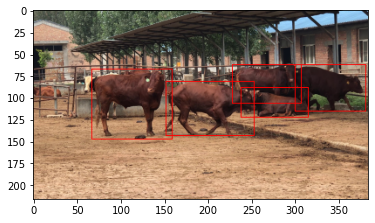

In [3]:
CD.infer_from_binaries(12, plot=True, return_boxes=False)

D:\Projects\cattle_detection\detection_models.py:103: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cow_masks = torch.tensor(cow_masks>0.4, dtype=torch.float)


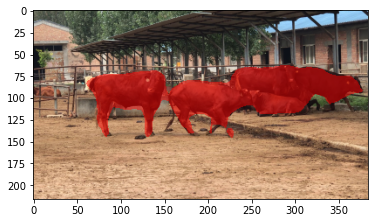

In [4]:
CS.infer_from_binaries(12, plot=True)

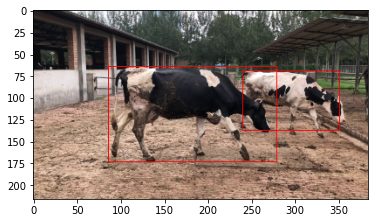

In [5]:
CD.infer_from_binaries(30, plot=True, return_boxes=False)

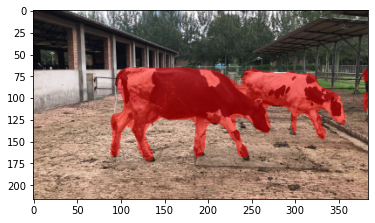

In [6]:
CS.infer_from_binaries(30, plot=True)

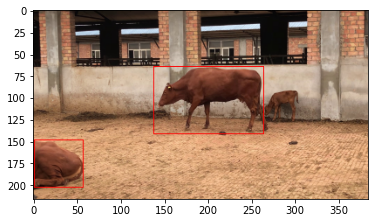

In [7]:
CD.infer_from_binaries(1150, plot=True, return_boxes=False)

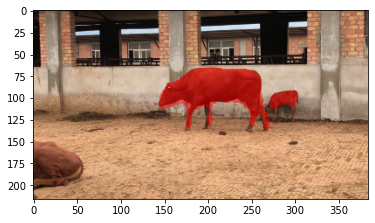

In [8]:
CS.infer_from_binaries(1150, plot=True)

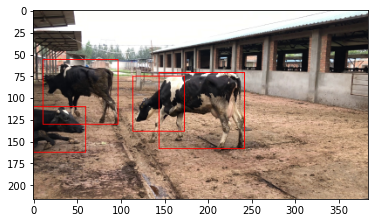

In [9]:
CD.infer_from_binaries(890, plot=True, return_boxes=False)

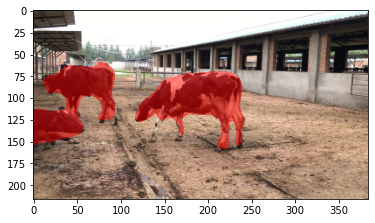

In [10]:
CS.infer_from_binaries(890, plot=True)